<a href="https://colab.research.google.com/github/natesheehan/h8-speech/blob/main/HateModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [15]:
!pip install WordCloud


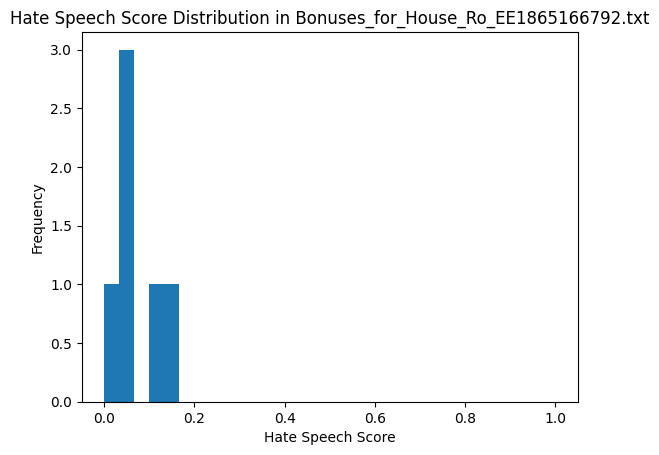

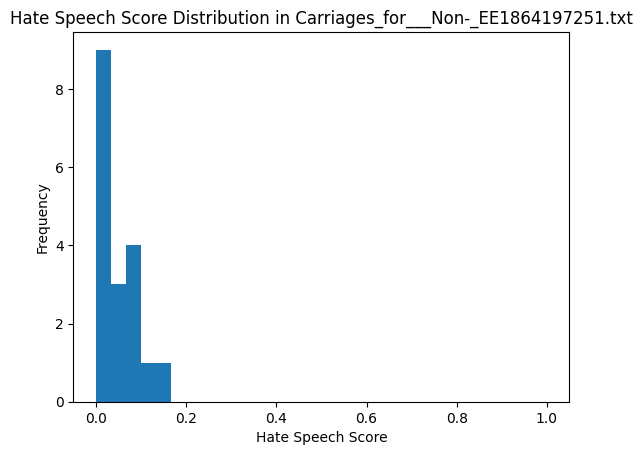

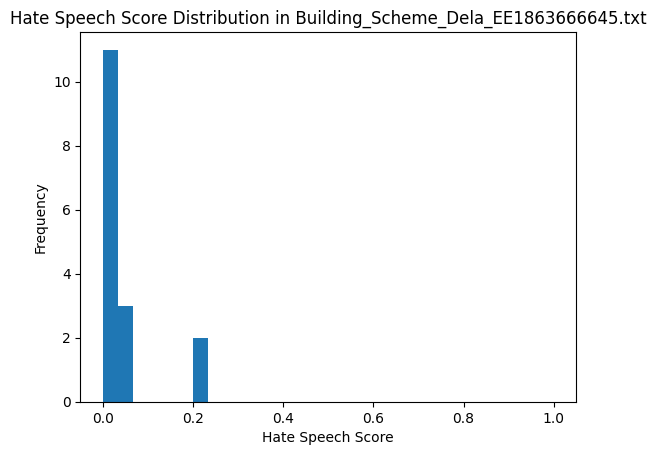

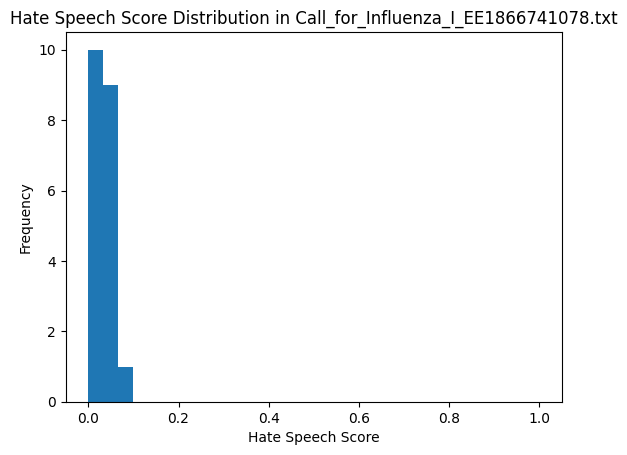

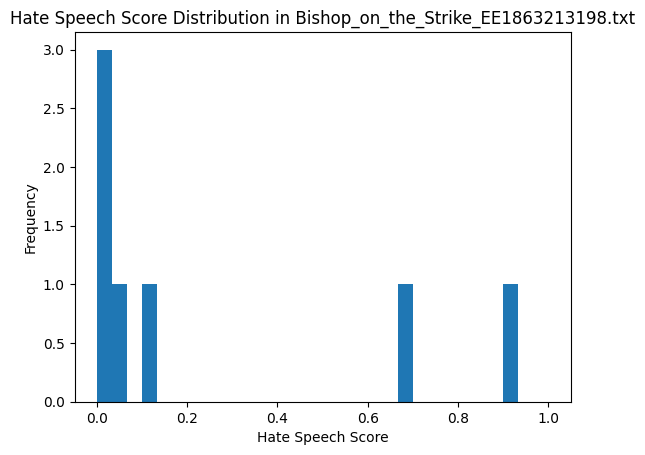

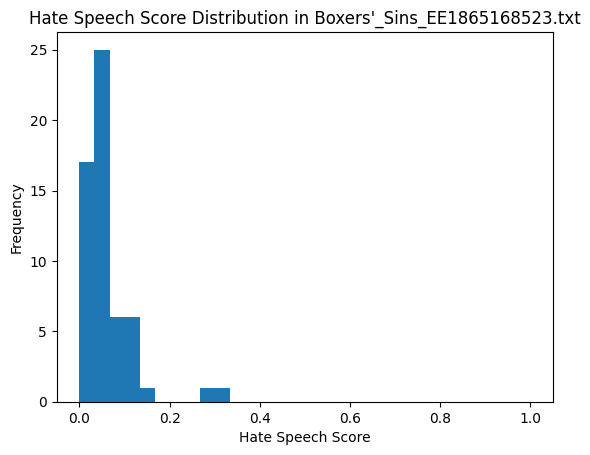

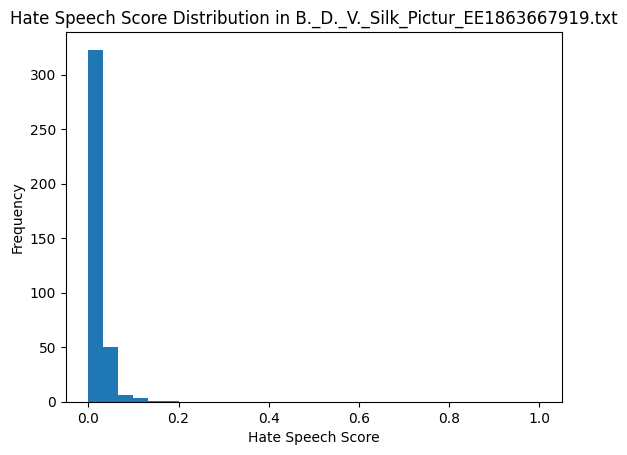

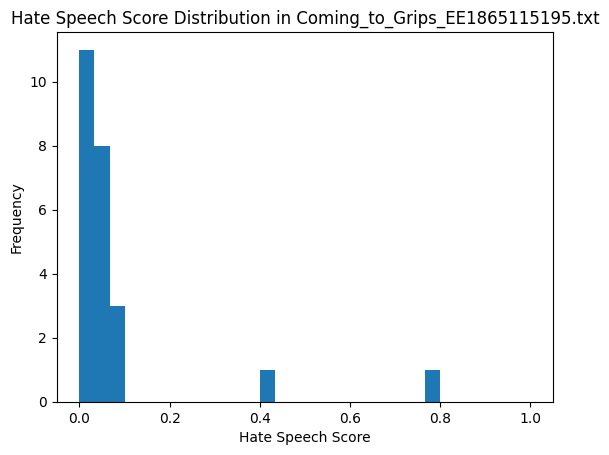

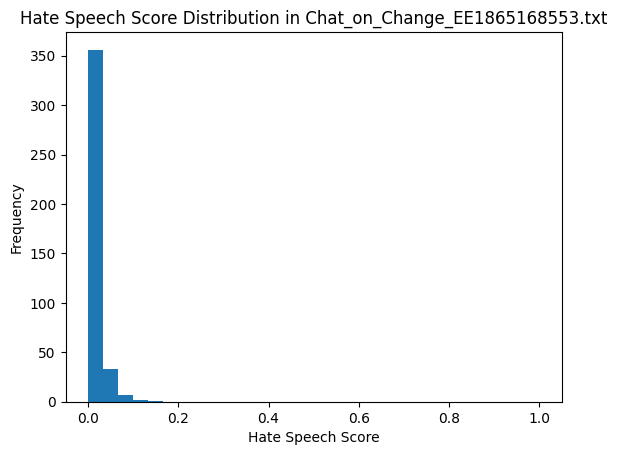

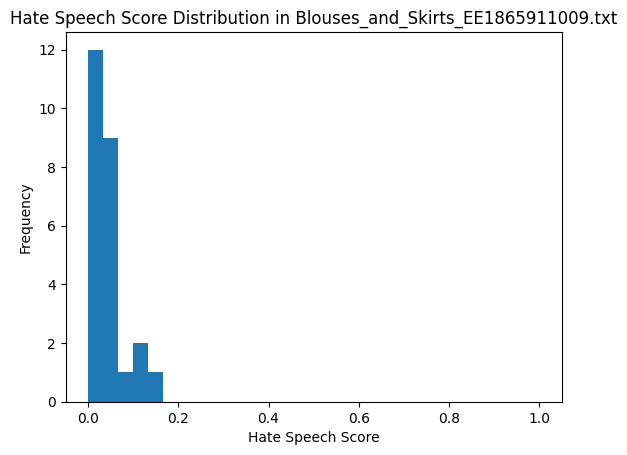

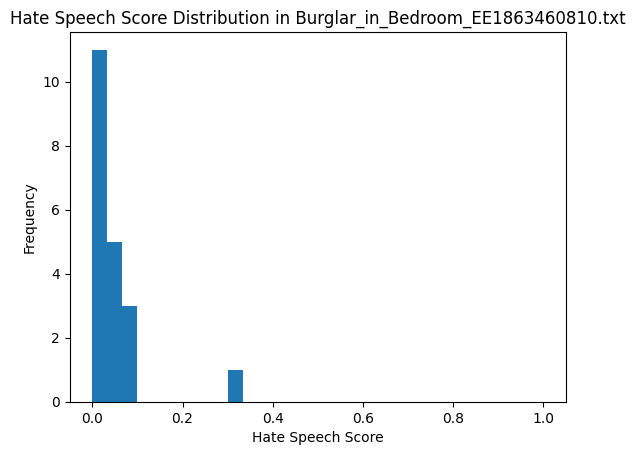

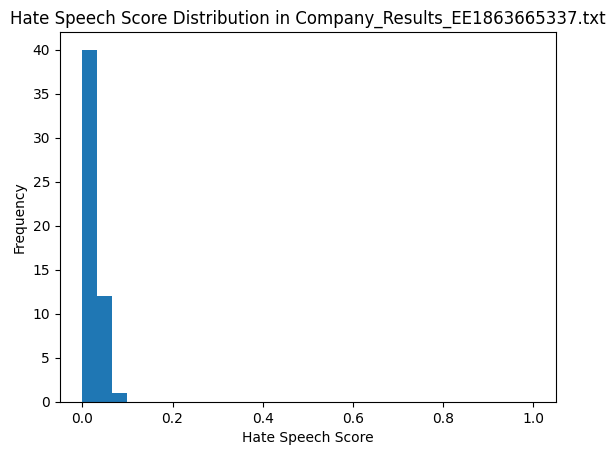

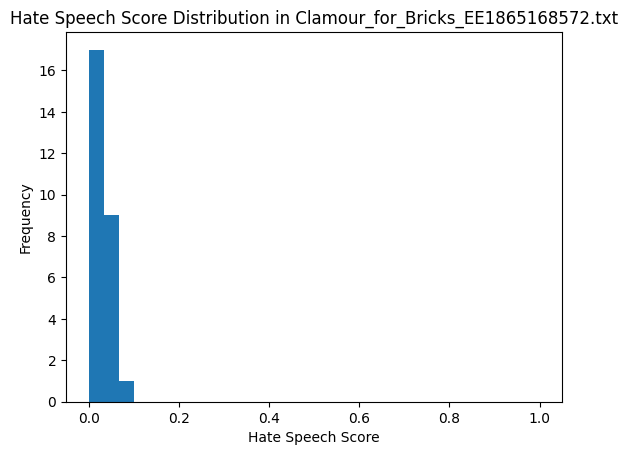

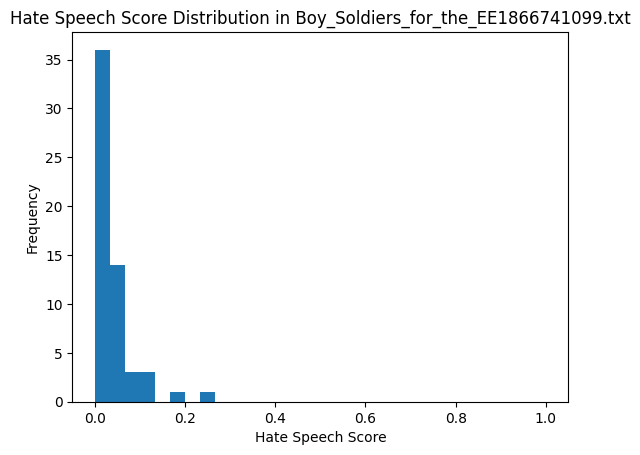

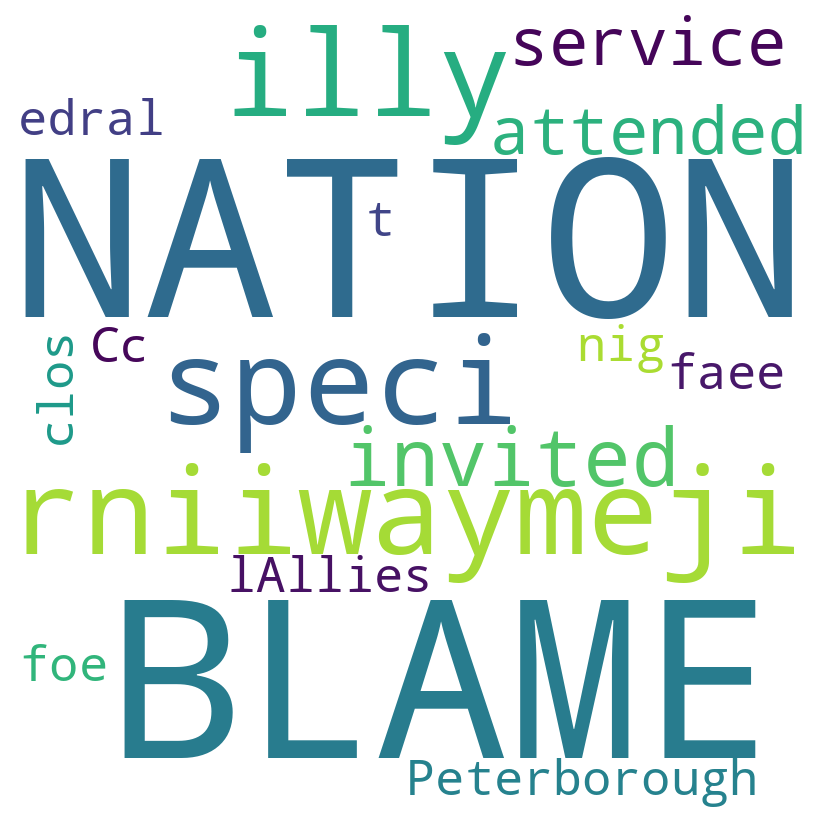

In [16]:
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def clean_text(text):
    # Implement your cleaning logic here
    return text

def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    cleaned_text = clean_text(text)
    sentences = cleaned_text.split('.')  # Simple sentence splitting, customize as needed

    scores = []
    high_hate_speech_sentences = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt")
        with torch.no_grad():
            logits = model(**inputs).logits
        predictions = torch.softmax(logits, dim=1)
        hate_speech_score = predictions[:,1].item()
        scores.append(hate_speech_score)

        # Collect sentences with high hate speech scores
        if hate_speech_score > 0.7:  # threshold for high hate speech probability
            high_hate_speech_sentences.append(sentence)

    return scores, ' '.join(high_hate_speech_sentences)

# Load model and tokenizer
model_name = "Hate-speech-CNERG/dehatebert-mono-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Directory containing text files
directory = "/content/data/"

all_scores = {}
all_high_hate_sentences = ""

# Loop through each file
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        file_scores, high_hate_speech_sentences = process_file(file_path)
        all_scores[filename] = file_scores
        all_high_hate_sentences += " " + high_hate_speech_sentences

# Plotting the results
for filename, scores in all_scores.items():
    plt.figure()
    plt.hist(scores, bins=30, range=(0,1))
    plt.title(f"Hate Speech Score Distribution in {filename}")
    plt.xlabel("Hate Speech Score")
    plt.ylabel("Frequency")
    plt.show()

# Generate and display a word cloud of high hate speech sentences
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_high_hate_sentences)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re
import string

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Fix common OCR errors
    ocr_errors = {
        '‘': "'", '’': "'", '`': "'", '“': '"', '”': '"',  # quotation marks
        '—': '-', '–': '-',  # different types of hyphens
        '…': '...',  # ellipsis
        '\ufeff': '',  # Byte Order Mark
        '\u200b': '',  # Zero Width Space
        '\u2028': '',  # Line Separator
        '\u202c': '',  # Pop Directional Formatting
        'ﬁ': 'fi', 'ﬂ': 'fl',  # ligatures
    }
    for error, correction in ocr_errors.items():
        text = text.replace(error, correction)

    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove extra spaces and line breaks
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuations (optional, depending on need)
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text.strip()

# The rest of your code remains the same


def generate_ngrams(text, n):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Generate n-grams
    return [' '.join(gram) for gram in ngrams(words, n)]

def process_file(file_path, n):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    cleaned_text = clean_text(text)
    n_grams = generate_ngrams(cleaned_text, n)

    scores = []
    high_hate_speech_ngrams = []
    for ngram in n_grams:
        inputs = tokenizer(ngram, return_tensors="pt")
        with torch.no_grad():
            logits = model(**inputs).logits
        predictions = torch.softmax(logits, dim=1)
        hate_speech_score = predictions[:,1].item()
        scores.append(hate_speech_score)

        # Collect n-grams with high hate speech scores
        if hate_speech_score > 0.7:  # threshold for high hate speech probability
            high_hate_speech_ngrams.append(ngram)

    return scores, ' '.join(high_hate_speech_ngrams)

# Load model and tokenizer
model_name = "Hate-speech-CNERG/dehatebert-mono-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Directory containing text files
directory = "/content/data/"
n = 3  # Adjust n for different n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.)

all_scores = {}
all_high_hate_ngrams = ""

# Loop through each file
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        file_scores, high_hate_speech_ngrams = process_file(file_path, n)
        all_scores[filename] = file_scores
        all_high_hate_ngrams += " " + high_hate_speech_ngrams

# Plotting the results
for filename, scores in all_scores.items():
    plt.figure()
    plt.hist(scores, bins=30, range=(0,1))
    plt.title(f"Hate Speech Score Distribution in {filename}")
    plt.xlabel("Hate Speech Score")
    plt.ylabel("Frequency")
    plt.show()

# Generate and display a word cloud of high hate speech n-grams
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_high_hate_ngrams)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
